### Rotinas quando efetuado MSE em todos os dados da população

In [2]:
with open ("out_2019_12_10.txt") as f:
    fl = f.read().strip()
algoName = 'NSGA-II'
surrogateName = 'DECISION-TREE'
problemName = 'DTLZ'

In [3]:
#print (fl.split('\nTREINA\n'))
ff = fl.split('\nTREINA\n')[1:]
all = []
for i in range (len (ff)):
    ff[i] = ff[i].split('\n')
    all.append (ff[i])
# print (len(all)/20)
allSep = []
ax = []
for i in range (len(all)):
    #print (len (all[i]))
    #print(all[i])
    if (i and i%20 == 0):
        allSep.append (ax[:])
        ax = [all[i][:]]
    else:
        # print ("all:", all[i][:])
        ax.append (all[i][:])
allSep.append(ax[:])
print (len (allSep))
for i in range (len (allSep)):
    for j in range (len(allSep[i])):
        allSep[i][j] = list (map (float, allSep[i][j]))
        
for i in range (len (allSep)):
    print (len (allSep[i]))


7
20
20
20
20
20
20
20


Number of Experiments: 7
Number of Runs: 20
Number of Evaluations per run: 88
__________ DTLZ 1 __________


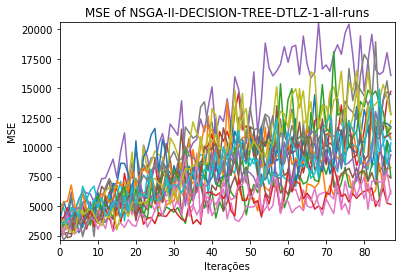

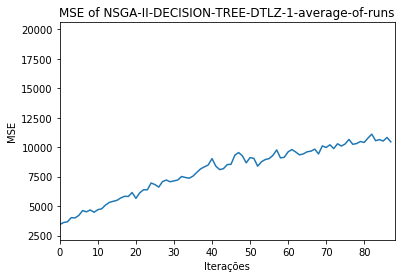

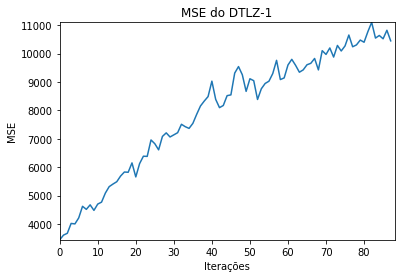

__________ DTLZ 2 __________


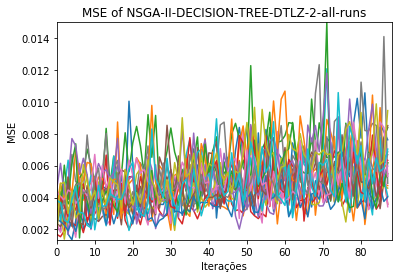

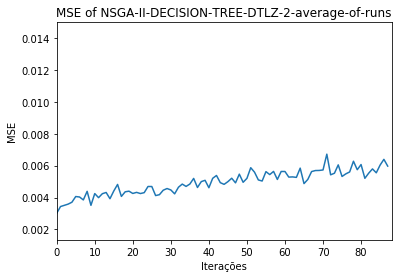

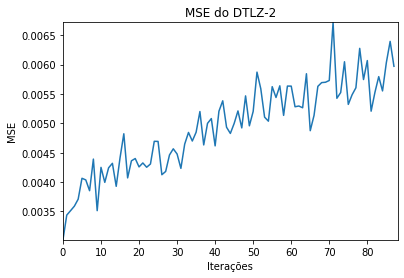

__________ DTLZ 3 __________


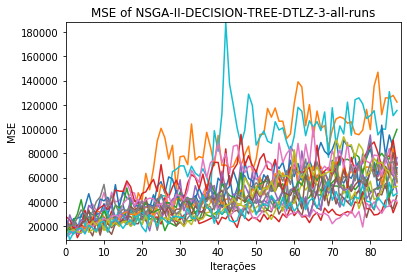

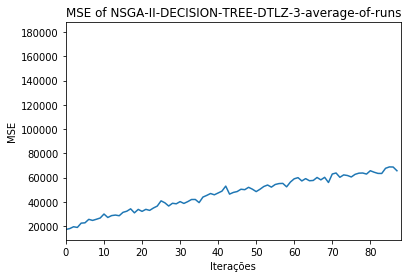

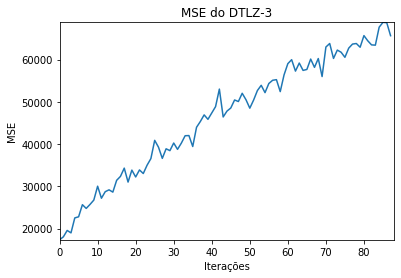

__________ DTLZ 4 __________


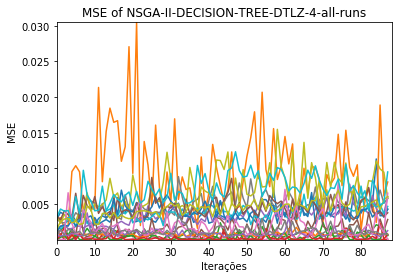

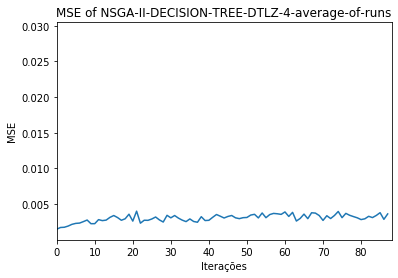

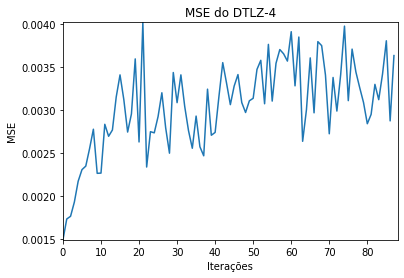

__________ DTLZ 5 __________


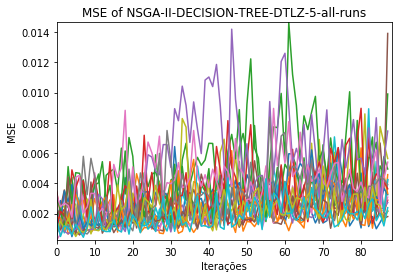

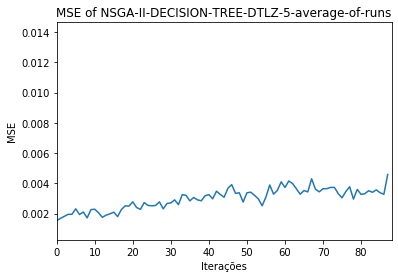

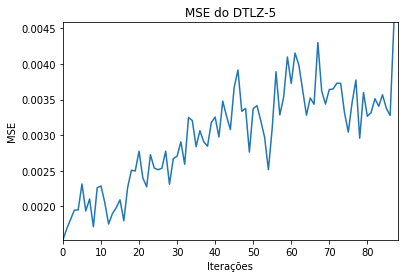

__________ DTLZ 6 __________


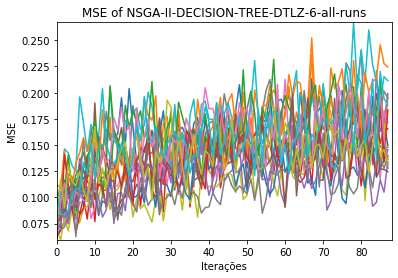

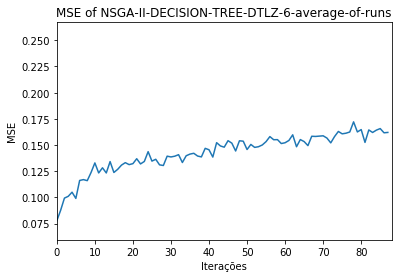

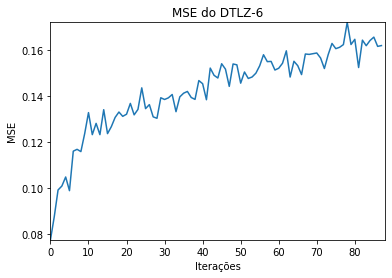

__________ DTLZ 7 __________


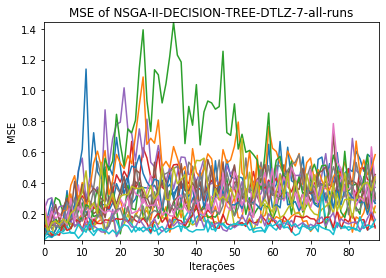

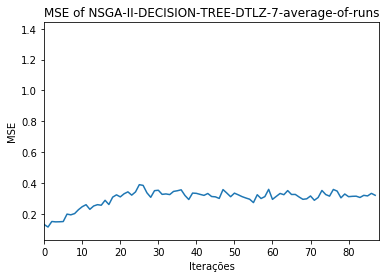

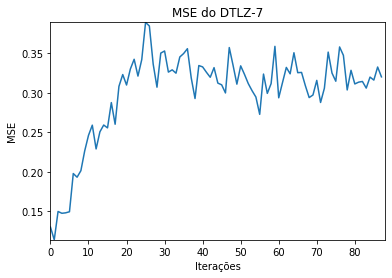

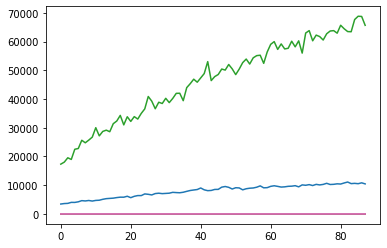

In [4]:
import matplotlib.pyplot as plt
# plt.scatter(x_treinamento, y_treinamento)
#plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'red')
#print (allSep[0][0])

nExp = len (allSep)
nRuns = len (allSep[0])
nEvals = len (allSep[0][0])
print("Number of Experiments:", nExp)
print("Number of Runs:", nRuns)
print("Number of Evaluations per run:", nEvals)
    

avr = {}
for i in range (nExp):
    avr[problemName + '-' + str(i+1)] = [0.0]*88
for i in range (nExp):
    runName = algoName + '-' + surrogateName + '-' + problemName
    print ("__________", problemName, i+1, "__________")
    mn = 1e9
    mx = -1e9
    for j in range (nRuns):
        plt.plot (range (nEvals), allSep[i][j])
        mn = min (mn, min (allSep[i][j]))
        mx = max (mx, max (allSep[i][j]))
        for k in range (nEvals):
            avr[problemName + '-' + str(i+1)][k] += allSep[i][j][k]/nRuns
    plt.xlim (0, nEvals)
    plt.ylim (mn, mx)
    plt.title ('MSE of ' + runName + '-' + str (i+1) + '-all-runs')
    plt.xlabel ("Iterações")
    plt.ylabel("MSE")
    plt.savefig ('MSE-' + runName + '-' + str (i+1) + '-all-runs.png', dpi=200)
    plt.show()
    
    plt.plot (range (nEvals), avr[problemName + '-' + str(i+1)])
    plt.xlim (0, nEvals)
    plt.ylim (mn, mx)
    plt.xlabel ("Iterações")
    plt.ylabel("MSE")
    plt.title ('MSE of ' + runName + '-' + str (i+1) + '-average-of-runs')
    plt.savefig ('MSE-' + runName + '-' + str (i+1) + '-average-of-runs.png', dpi=200)
    plt.show()
    
    plt.plot (range (nEvals), avr[problemName + '-' + str(i+1)])
    plt.xlim (0, nEvals)
    plt.ylim (min (avr[problemName + '-' + str(i+1)]), max (avr[problemName + '-' + str(i+1)]))
    plt.xlabel ("Iterações")
    plt.ylabel("MSE")
    plt.title ('MSE do ' + problemName + '-' + str (i+1))
    plt.savefig ('MSE-' + runName + '-' + str (i+1) + '-average-of-runs-fitted.png', dpi=200)
    plt.show()

# Não tem muita utilidade simplesmente plotar os dados obtidos juntos, seria mais interessante se fosse feito a normalização desses dados
# por conta da diferença grande de amplitude dos valores para cada problema.
# print (avr)
for dt in avr:
    plt.plot(range(nEvals), avr[dt], label=dt)
plt.show()

É notável como os surrogates nos problemas DTLZ 1, 2, 3, 5 e 6 tem tendência de crescimento, contra os 4 e 7 que não apresentam padrão.

Será que ter treino no meio do processo seria interessante?